In [2]:

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import warnings

warnings.filterwarnings('ignore')


In [3]:
test_dir="/kaggle/input/brain-tumor-mri-dataset/Testing"
train_dir='/kaggle/input/brain-tumor-mri-dataset/Training'

In [4]:
train_classes = os.listdir(train_dir)
test_classes = os.listdir(test_dir)
print(train_classes)
print(test_classes)


['pituitary', 'notumor', 'meningioma', 'glioma']
['pituitary', 'notumor', 'meningioma', 'glioma']


In [25]:
def show_sample_images(directory):
    sample_images=np.random.choice(os.listdir(directory),size=6)
    plt.figure(figsize=(8,6))
    for i,img_name in enumerate(sample_images):
        ax=plt.subplot(2,3,i+1)
        img=image.load_img(os.path.join(directory,img_name),target_size=(150,150))
        
        files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

        number of files = len(files)
        classe_name=directory.split("/")[-1]
        plt.axis("off")
        plt.imshow(img)
        plt.title(classe_name)
    print(f"Number of images {classe_name} : {number of files}")
    print(f'Size of image :{img.size}')
    

Number of images glioma : 1321
Size of image :(150, 150)


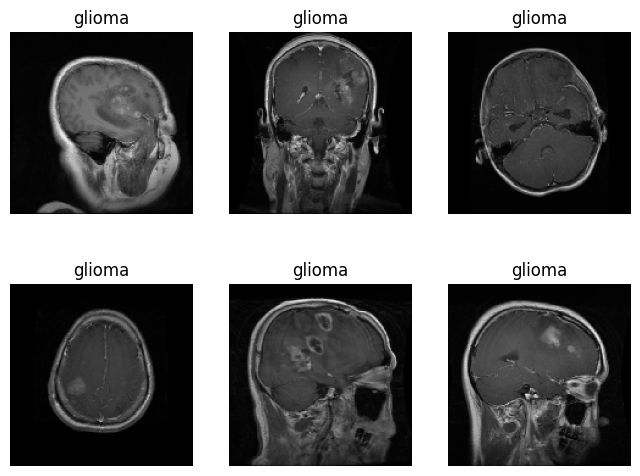

In [26]:
glioma_dir=os.path.join(train_dir,'glioma')
show_sample_images(glioma_dir)


Number of images meningioma : 1339
Size of image :(150, 150)


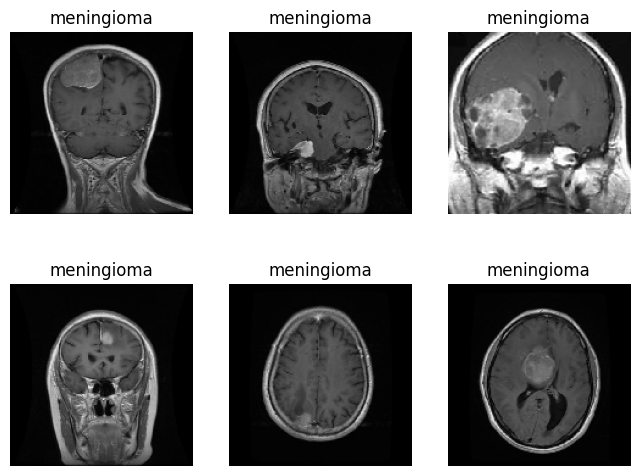

In [27]:
meningioma_dir=os.path.join(train_dir,'meningioma')
show_sample_images(meningioma_dir)

Number of images notumor : 1595
Size of image :(150, 150)


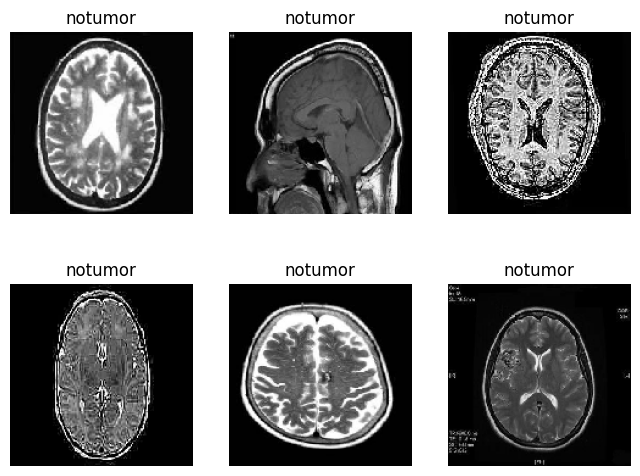

In [28]:
notumor_dir=os.path.join(train_dir,'notumor')
show_sample_images(notumor_dir)

Number of images pituitary : 1457
Size of image :(150, 150)


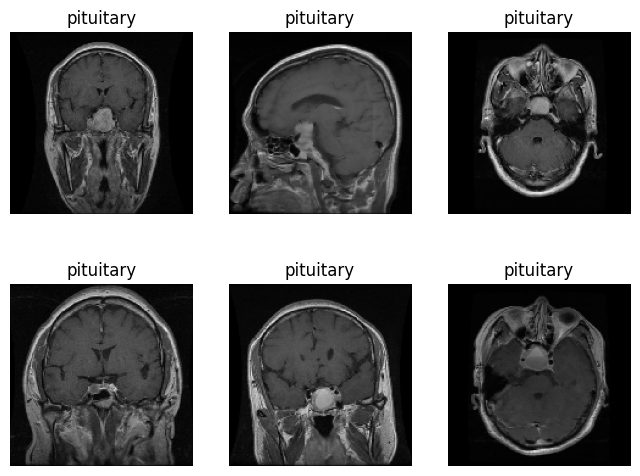

In [29]:
pituitary_dir=os.path.join(train_dir,'pituitary')
show_sample_images(pituitary_dir)

In [11]:

train_datagen= ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen= ImageDataGenerator(
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
            train_dir,
            target_size=(224,224),
            batch_size=64,
            class_mode='categorical')

test_generator=test_datagen.flow_from_directory(
            test_dir,
            target_size=(224,224),
            batch_size=64,
            class_mode='categorical')



Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import MultiHeadAttention
# Load the ResNet50 model pre-trained on ImageNet without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224, 3))
base_model.trainable = False
# Create a new model and add the ResNet50 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())

model.add(MultiHeadAttention(num_heads=4, key_dim=64))
model.add(Dense(256, activation='relu')),
model.add(Dropout(0.3)),
model.add(Dense(128, activation='relu')),
model.add(Dropout(0.3)),
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.3)),
model.add(Dense(16, activation='relu')),
model.add(Dense(4, activation='softmax'))  # Assuming 4 classes


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Assuming `train_generator` and `validation_generator` are your data generators
callbacks = [
    
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('model.keras', monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)
]


# Train the model
history=model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator,
    callbacks=callbacks
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/25


I0000 00:00:1741528578.295357     119 service.cc:145] XLA service 0x7e84dc0052a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741528578.295431     119 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1741528578.295436     119 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/90 ━━━━━━━━━━━━━━━━━━━━ 36:46 25s/step - accuracy: 0.3125 - loss: 2.2564

I0000 00:00:1741528587.417829     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.5788 - loss: 4.5148 - val_accuracy: 0.7979 - val_loss: 0.8264 - learning_rate: 0.0010
Epoch 2/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 903ms/step - accuracy: 0.8165 - loss: 0.7027 - val_accuracy: 0.8314 - val_loss: 0.7058 - learning_rate: 0.0010
Epoch 3/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 907ms/step - accuracy: 0.8540 - loss: 0.5660 - val_accuracy: 0.8429 - val_loss: 0.5027 - learning_rate: 0.0010
Epoch 4/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 85s 883ms/step - accuracy: 0.8858 - loss: 0.3667 - val_accuracy: 0.8230 - val_loss: 0.5722 - learning_rate: 0.0010
Epoch 5/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 915ms/step - accuracy: 0.8920 - loss: 0.3426 - val_accuracy: 0.8673 - val_loss: 0.4001 - learning_rate: 0.0010
Epoch 6/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 85s 886ms/step - accuracy: 0.8874 - loss: 0.3429 - val_accuracy: 0.8566 - val_loss: 0.4123 - learning_rate: 0.0010
Epoch 7/25
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 908ms/step - accuracy: 0.8956 - loss: 0.3080 - val_ac

In [17]:
plt.figure(figsize=(8,4))
def plot_learning_curves(history):
    
    
    plt.subplot(2,1,1)
    
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('train Accuracy vs val_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()
    
    # Summarize history for loss
    plt.subplot(2,1,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('train_loss vs val_loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

<Figure size 800x400 with 0 Axes>

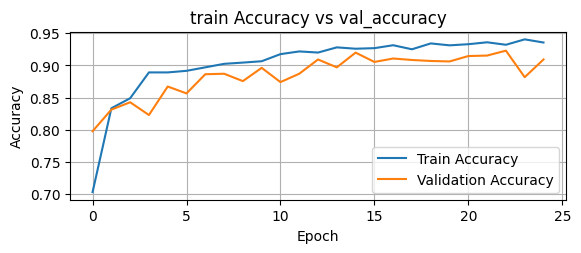

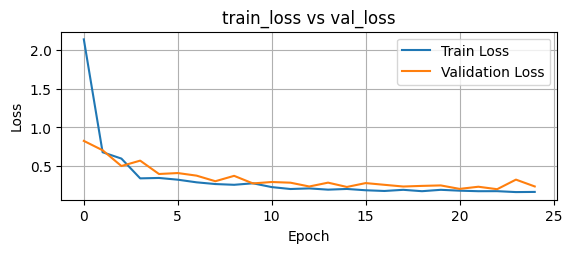

In [18]:
plot_learning_curves(history)

In [19]:
model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 722ms/step - accuracy: 0.9244 - loss: 0.1943


[0.22340688109397888, 0.9168573617935181]

In [20]:
model=load_model("model.keras")

In [21]:
def prediction(img):
    img=image.load_img((img),target_size=(224,224))
    plt.imshow(img)
    plt.axis("off")
    img_array=image.img_to_array(img)
    img_array=img_array.reshape(1,224, 224, 3)
    predicted_scores=model.predict(img_array)
    
    return predicted_scores

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[9.9142402e-05 1.4594199e-04 9.9887604e-01 8.7880052e-04]
real_classe: notumor
2
predicted_classe: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[4.6051082e-06 3.8839434e-04 9.9960625e-01 7.0005115e-07]
real_classe: notumor
2
predicted_classe: notumor
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[0.06248491 0.93001705 0.00114955 0.0063484 ]
real_classe: meningioma
1
predicted_classe: meningioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[4.1633509e-02 9.2828131e-01 1.6948292e-05 3.0068247e-02]
real_classe: meningioma
1
predicted_classe: meningioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[9.9997962e-01 2.0299665e-05 7.2192781e-09 3.2926060e-08]
real_classe: glioma
0
predicted_classe: glioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[8.5694039e-01 1.4304982e-01 7.5489100e-07 9.1705233e-06]
real_classe: glioma
0
predicted_classe: glioma
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[9.9920064e-01 7.7712024e-04 2.1242984e-05 1.0913922e-06]
real_classe: glioma
0
predicted_classe

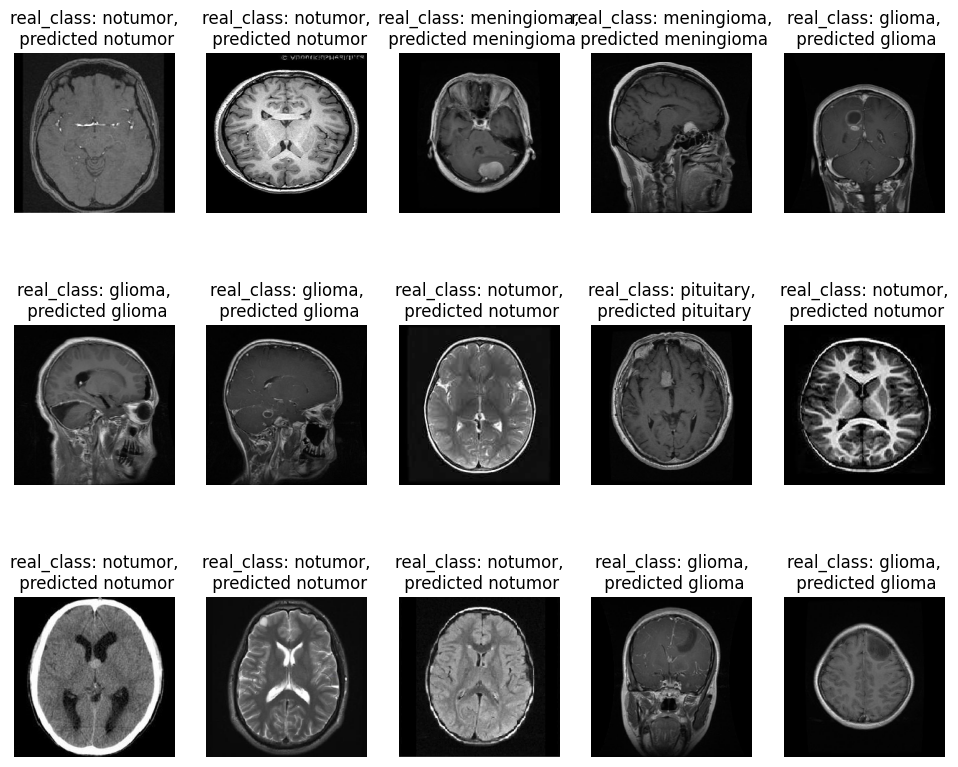

In [23]:
import random
compteur=0
plt.figure(figsize=(12,10))

while compteur<15:
    
    #to plot many images once
    plt.subplot(3,5,compteur+1)
    
    #choose a class randomly in test_set
    classe = random.choice(test_classes)
    
    #define the path for this specifique class
    path=os.path.join(test_dir,classe)
    
    # load files in this class choosed randomly
    file_names=[f for f in os.listdir(path)]
    
    #choose an image randomly in the list of files
    img = random.choice(file_names)
    img_name=os.path.join(path,img)
    
    predicted_scores=prediction(img_name)
    print(predicted_scores[0])
    print(f'real_classe: {classe}')
    
    
    #make prediction
    predicted_classe=np.argmax(predicted_scores[0])
    print(predicted_classe)
    
    # reverse data in test_classes which start from bottom to top
    test_classe=test_classes[::-1]
    #get the predicted class name
    predicted_classe_name=test_classe[predicted_classe]
    print(f'predicted_classe: {predicted_classe_name}')

    plt.title(f"real_class: {classe},\n predicted {predicted_classe_name}")
    compteur+=1

